Binning or Discretization is a data preprocessing technique that involves converting continuous variables into discrete ones by grouping continuous data points into intervals or "bins." Discretization transforms continuous attributes—those that can take on any value within a range—into a finite set of intervals. Each interval is then treated as a distinct categorical value.

Why Use Discretization

1. To handle Outliers
2. To improve the value spread

Types of Discretization

1. Unsupervised
2. Supervised
3. Custom Discretization or binning

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer

In [ ]:
df = pd.read_csv("train.csv", usecols=['Age', 'Fare', 'Survived'])

In [ ]:
df

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
...,...,...,...
886,0,27.0,13.0000
887,1,19.0,30.0000
888,0,NaN,23.4500
889,1,26.0,30.0000


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.shape

(714, 3)

In [ ]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [ ]:
X = df.iloc[:,1:]
y = df.iloc[:, 0]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.head(2)

,Age,Fare
328,31.0,20.5250
73,26.0,14.4542


In [ ]:
clf = DecisionTreeClassifier()

In [ ]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred)

0.6433566433566433

In [ ]:
np.mean(cross_val_score(DecisionTreeClassifier(), X, y, cv=10, scoring='accuracy'))

0.6303012519561816

In [ ]:
kbin_age = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile')
kbin_fare = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile')

In [ ]:
trf = ColumnTransformer([
    ('first', kbin_age, ['Age']),
    ('second', kbin_fare, ['Fare'])
])

In [ ]:
X_train_trf = trf.fit_transform(X_train)
X_test_trf = trf.transform(X_test)

In [ ]:
trf.named_transformers_['second'].n_bins_

array([10])

In [ ]:
trf.named_transformers_['second'].bin_edges_

array([array([  0.    ,   7.75  ,   7.8958,   9.225 ,  13.    ,  15.75  ,
               26.    ,  29.125 ,  51.4792,  82.1708, 512.3292])         ],
      dtype=object)

In [44]:
output = pd.DataFrame({
    'age': X_train['Age'],
    'age_trf': X_train_trf[:,0],
    'fare': X_train['Fare'],
    'fare_trf': X_train_trf[:,1]
})

In [45]:
output['age_labels'] = pd.cut(x=X_train['Age'],
                              bins=trf.named_transformers_['first'].bin_edges_[0].tolist()
                              )
output['fare_labels'] = pd.cut(x=X_train['Fare'],
                               bins=trf.named_transformers_['second'].bin_edges_[0].tolist()
                               )

In [48]:
output

,age,age_trf,fare,fare_trf,age_labels,fare_labels
328,31.0,5.0,20.5250,5.0,"(28.5, 32.0]","(15.75, 26.0]"
73,26.0,4.0,14.4542,4.0,"(25.0, 28.5]","(13.0, 15.75]"
253,30.0,5.0,16.1000,5.0,"(28.5, 32.0]","(15.75, 26.0]"
719,33.0,6.0,7.7750,1.0,"(32.0, 36.0]","(7.75, 7.896]"
666,25.0,4.0,13.0000,4.0,"(22.0, 25.0]","(9.225, 13.0]"
...,...,...,...,...,...,...
92,46.0,8.0,61.1750,8.0,"(42.0, 50.0]","(51.479, 82.171]"
134,25.0,4.0,13.0000,4.0,"(22.0, 25.0]","(9.225, 13.0]"
337,41.0,7.0,134.5000,9.0,"(36.0, 42.0]","(82.171, 512.329]"
548,33.0,6.0,20.5250,5.0,"(32.0, 36.0]","(15.75, 26.0]"


In [49]:
clf = DecisionTreeClassifier()
clf.fit(X_train_trf, y_train)
y_pred2 = clf.predict(X_test_trf)

In [51]:
accuracy_score(y_test, y_pred2)

0.6223776223776224

In [52]:
x_trf = trf.fit_transform(X)
np.mean(cross_val_score(DecisionTreeClassifier(), x_trf, y, cv=10, scoring='accuracy'))

0.682140062597809

In [55]:
def discretize(bins, strategy):
    kbin_age = KBinsDiscretizer(n_bins=bins, encode='ordinal', strategy=strategy)
    kbin_fare = KBinsDiscretizer(n_bins=bins, encode='ordinal', strategy=strategy)

    trf = ColumnTransformer([
        ('first', kbin_age, ['Age']),
        ('second', kbin_fare, ['Fare'])
    ])

    X_trf = trf.fit_transform(X)
    print(f"Accuracy Score: {np.mean(cross_val_score(DecisionTreeClassifier(), X_trf, y, cv=10, scoring='accuracy'))}")

    plt.figure(figsize=(16, 10))
    plt.subplot(121)
    plt.hist(X['Age'])
    plt.title('Before')

    plt.subplot(122)
    plt.hist(X_trf[:,0], color='red')
    plt.title('After')

    plt.figure(figsize=(16, 10))
    plt.subplot(121)
    plt.hist(X['Fare'])
    plt.title('Before')

    plt.subplot(122)
    plt.hist(X_trf[:,1], color='red')
    plt.title('After')
    plt.show()

Accuracy Score: 0.682140062597809


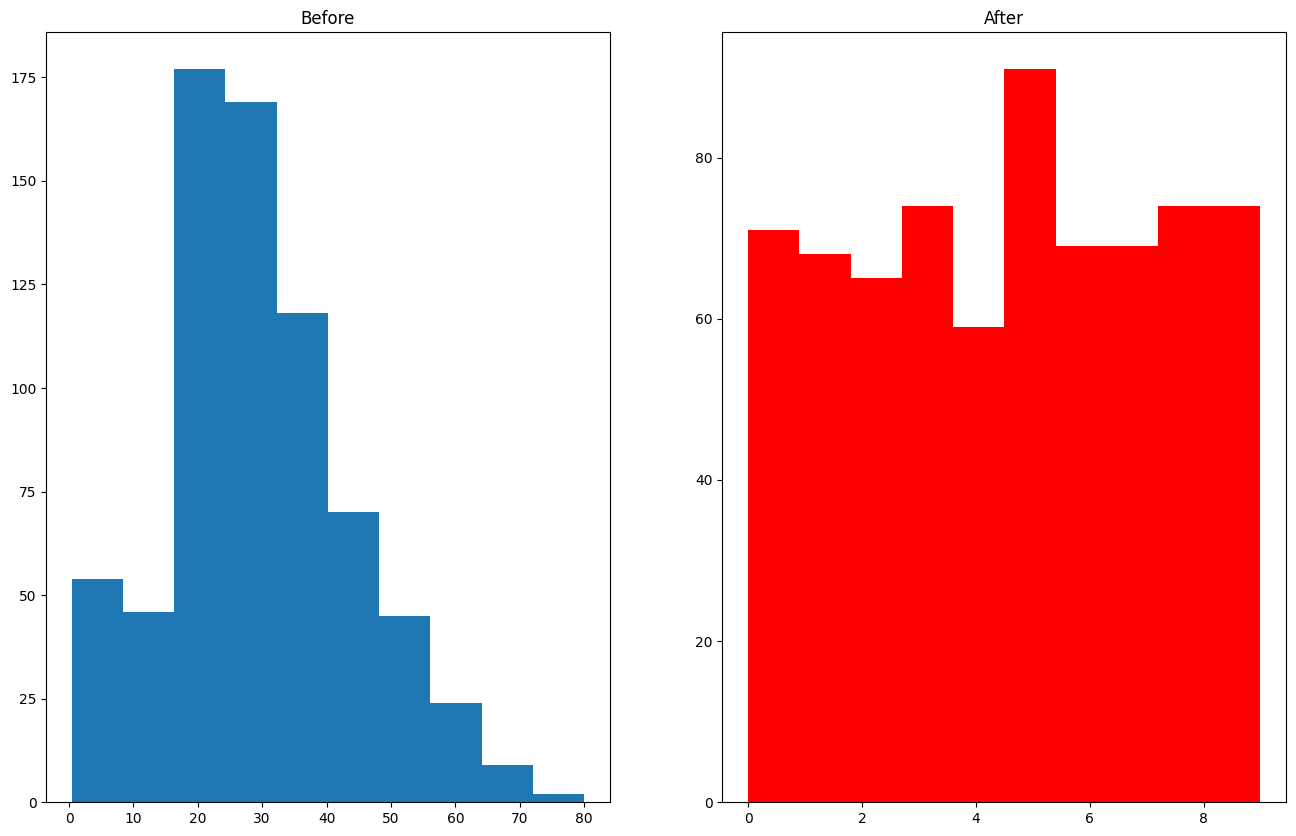

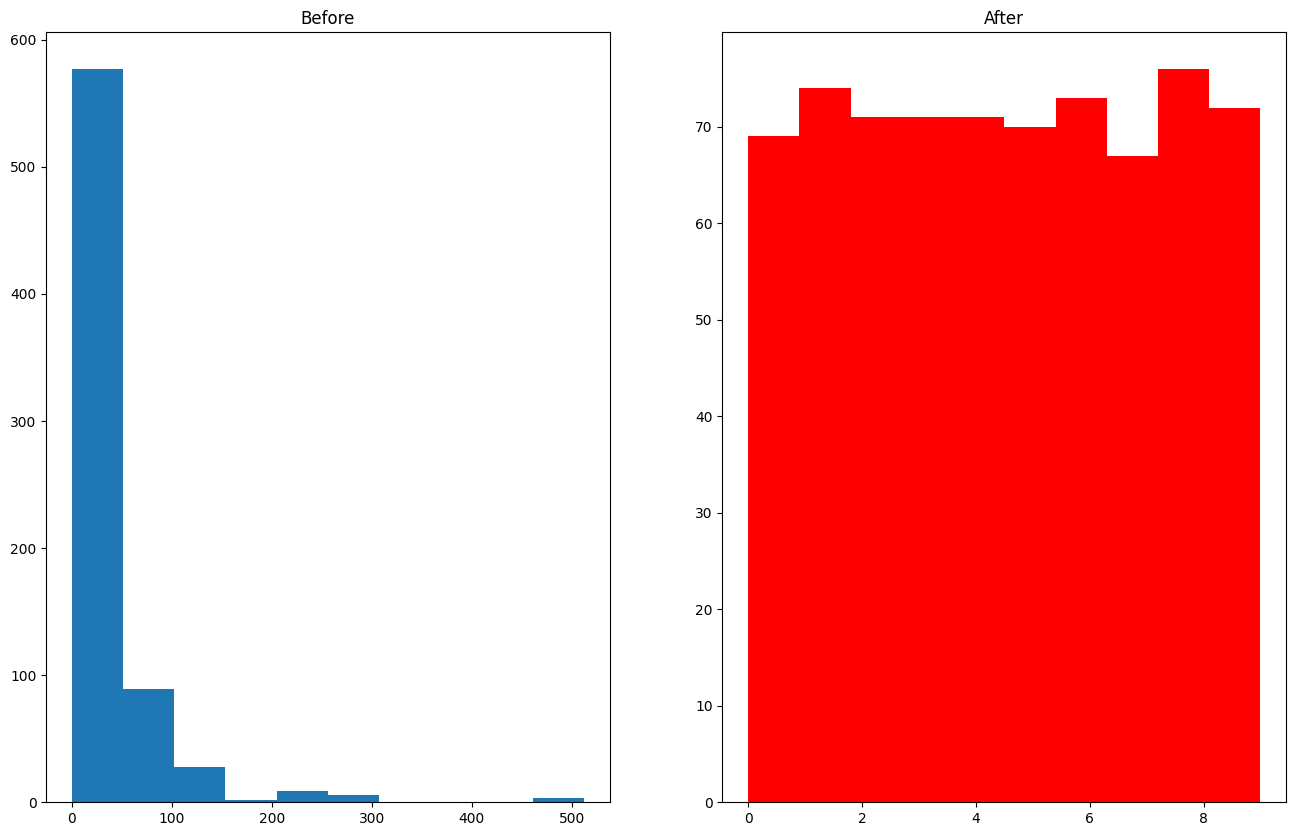

In [56]:
discretize(10, 'quantile')

Accuracy Score: 0.6864632237871675


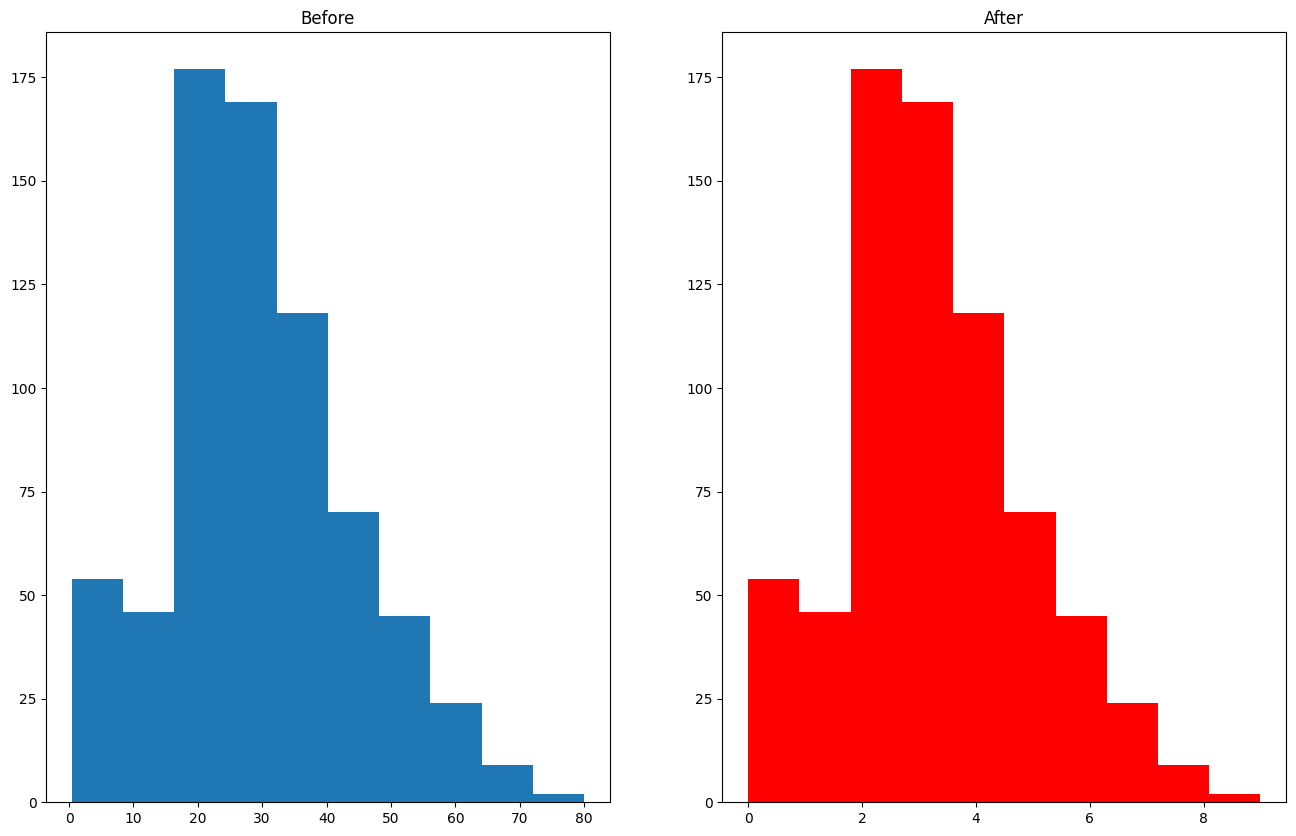

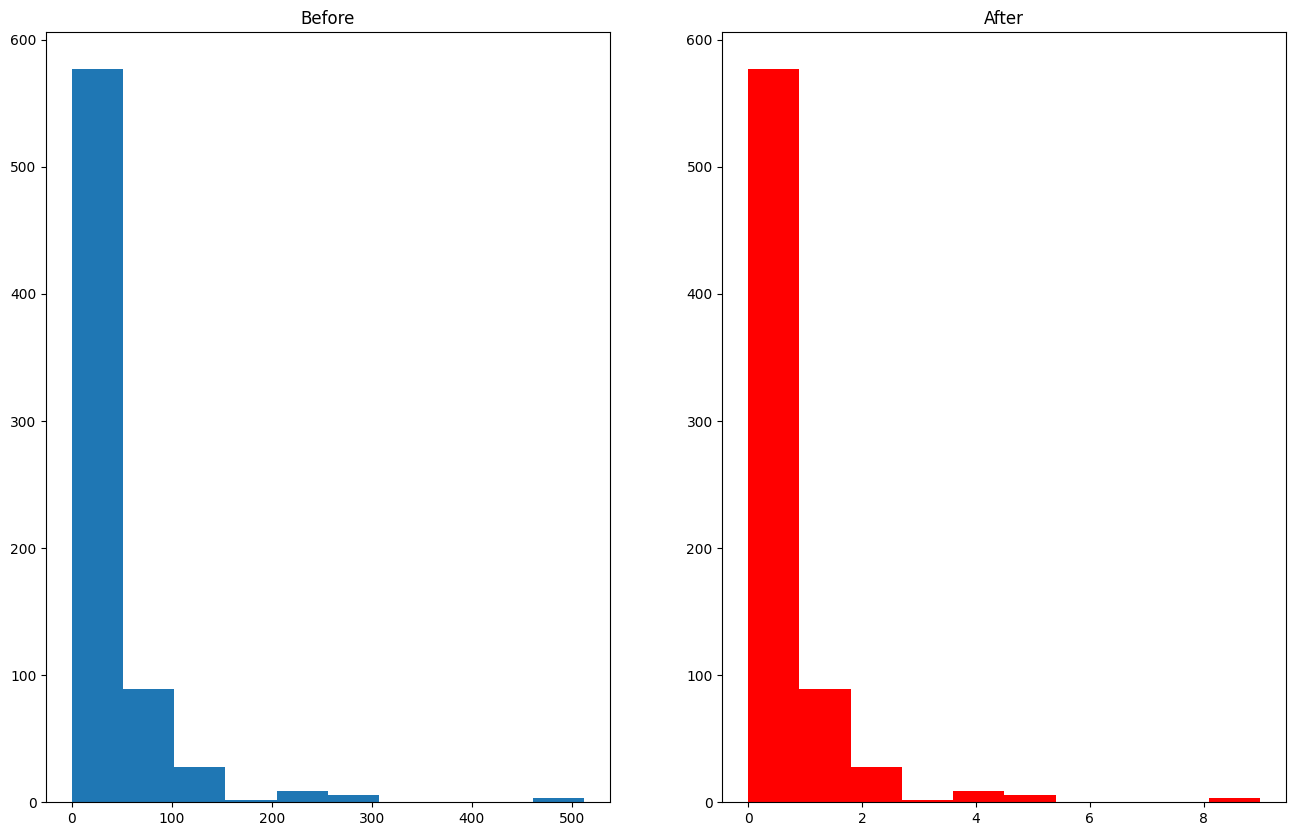

In [57]:
discretize(10, 'uniform')

Accuracy Score: 0.6584702660406886


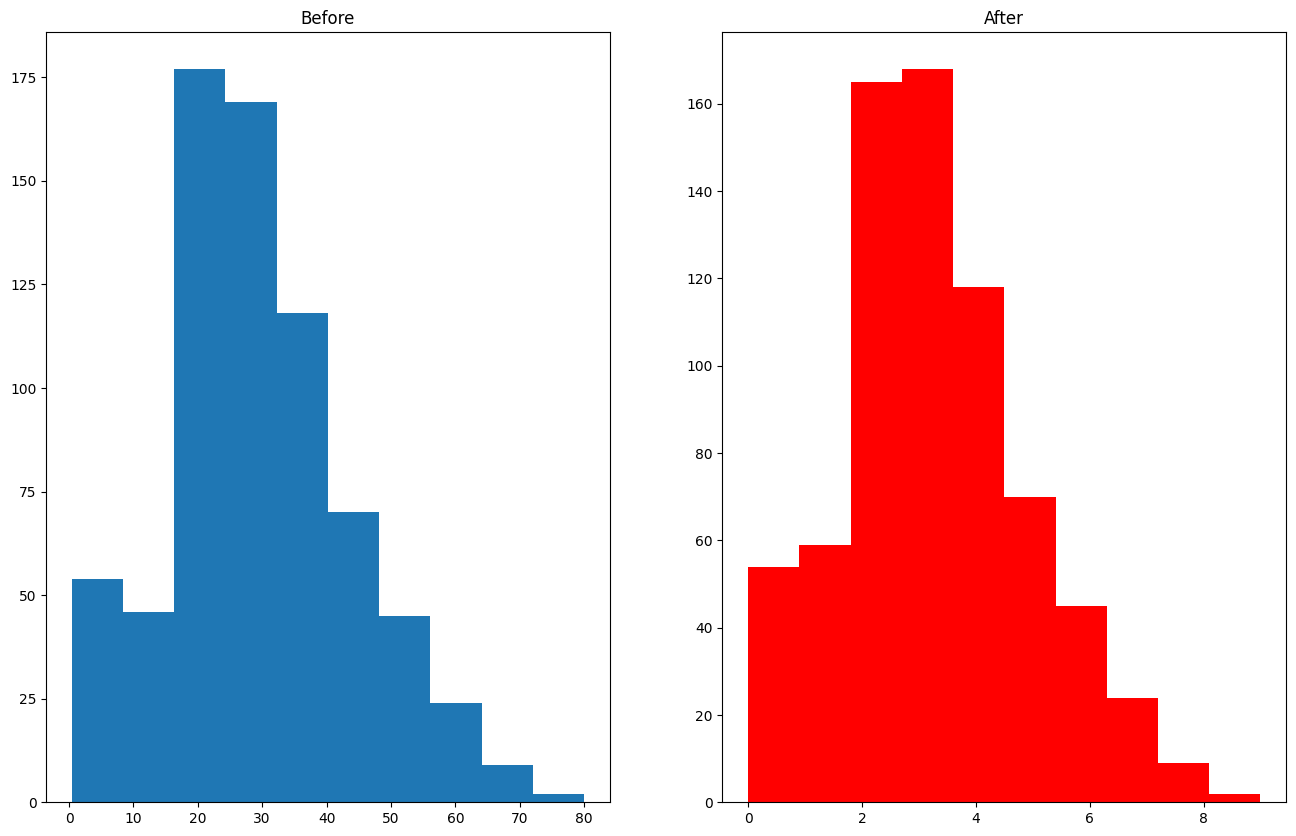

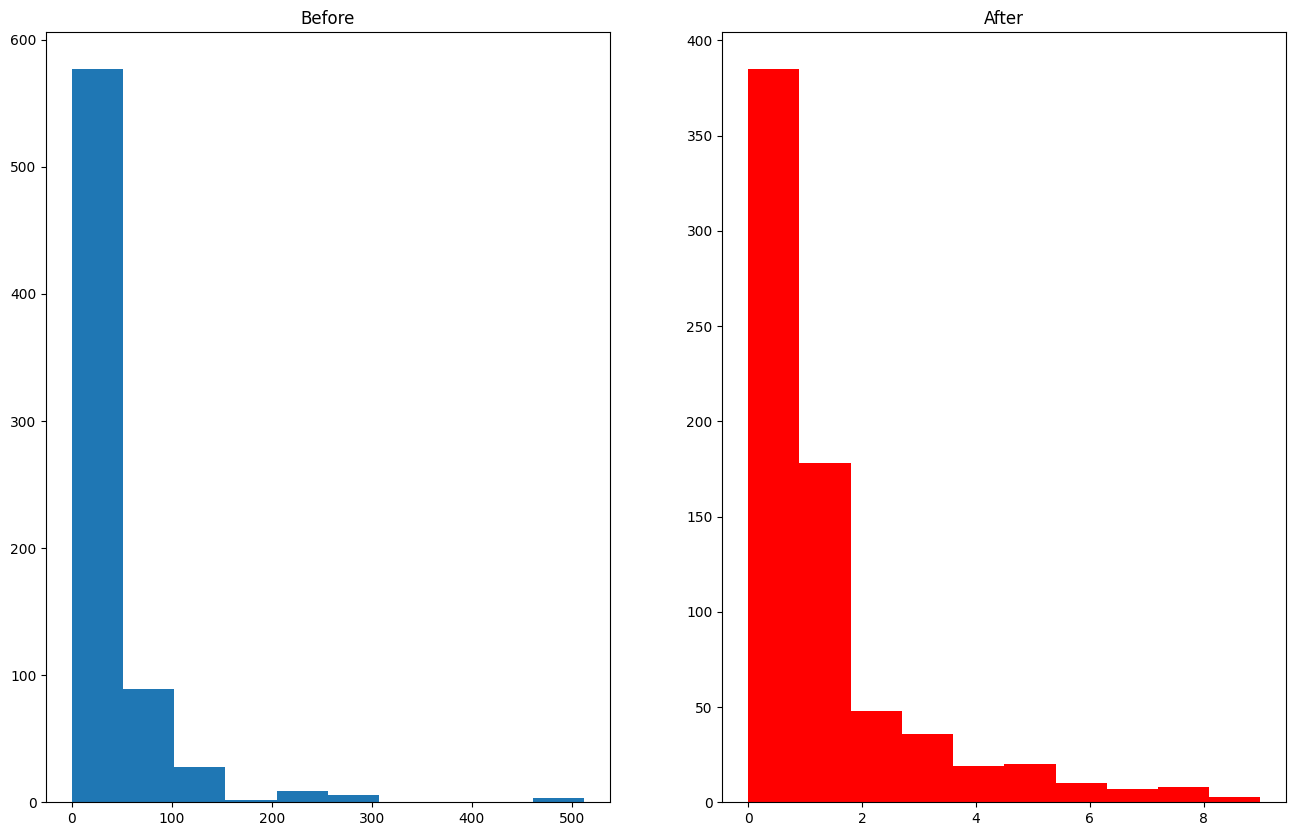

In [58]:
discretize(10, 'kmeans')